# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
  Dataset yang digunakan diperoleh dari Kaggle
  Bank Transaction Dataset for Fraud Detection:(https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: Mengandung 2512 baris dan 16 kolom

   - **Tipe Data**: Mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

# **2. Import Library**

Mengimpor library yang dibutuhkan
- Pandas
- Numpy
- Matplotlob
- Seaborn
- Scikit learn
- yellowbrick

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [97]:
bank_data = pd.read_csv(r"https://raw.githubusercontent.com/Nadila-agustF/Proyek-Machine-Learning-Pemula/refs/heads/main/bank_transactions_data.csv")

In [98]:
# Melihat 5 baris pertama dataset
bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [99]:
# menghapus kolom yang tidak relevan
bank_data = bank_data.drop(columns=["TransactionID", "TransactionDate", "AccountID", "DeviceID", "IP Address", "LoginAttempts", "MerchantID", "PreviousTransactionDate" ])
bank_data

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,7429.40
...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,12690.79
2508,251.54,Debit,Tucson,Branch,48,Doctor,177,254.75
2509,28.63,Debit,San Diego,Branch,56,Retired,146,3382.91
2510,185.97,Debit,Denver,Online,23,Student,19,1776.91


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Memahami struktur data






In [100]:
# Mencari informasi jumlah baris dan kolom dataset
print("Jumlah baris dan kolom dataset: ", bank_data.shape)

bank_data.info()

Jumlah baris dan kolom dataset:  (2512, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 157.1+ KB


#### Menangani Data yang Hilang

In [101]:
# Analisis missing value
print("Jumlah missing value: " ,bank_data.isna().sum())

# Analisis duplikasi data
print("Jumlah duplikasi data: ", bank_data.duplicated())

Jumlah missing value:  TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
AccountBalance         0
dtype: int64
Jumlah duplikasi data:  0       False
1       False
2       False
3       False
4       False
        ...  
2507    False
2508    False
2509    False
2510    False
2511    False
Length: 2512, dtype: bool


Note: Data aman dari missing value maupun duplikasi data

#### Analisis Distribusi dan Korelasi


In [102]:
# Analisis distribusi variable numerik statistik deskripsif
bank_data.describe(include=["number"])

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,5114.302966
std,291.946243,17.792198,69.963757,3900.942499
min,0.260000,18.000000,10.000000,101.250000
25%,81.885000,27.000000,63.000000,1504.370000
50%,211.140000,45.000000,112.500000,4735.510000
75%,414.527500,59.000000,161.000000,7678.820000
max,1919.110000,80.000000,300.000000,14977.990000


In [103]:
# Kolom dengan variable numerik
numeric_var = bank_data.select_dtypes(include=['number']).columns
numeric_var

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance'],
      dtype='object')

Note: Terdapat 4 kolom dengan variable numerik

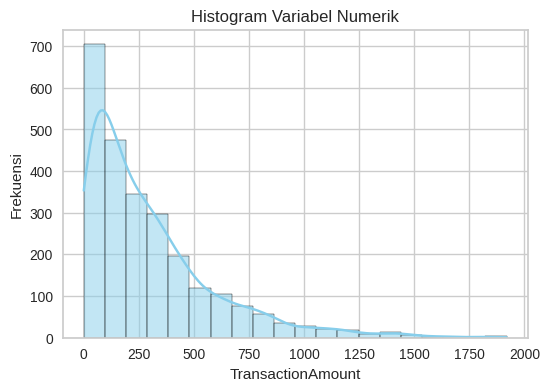

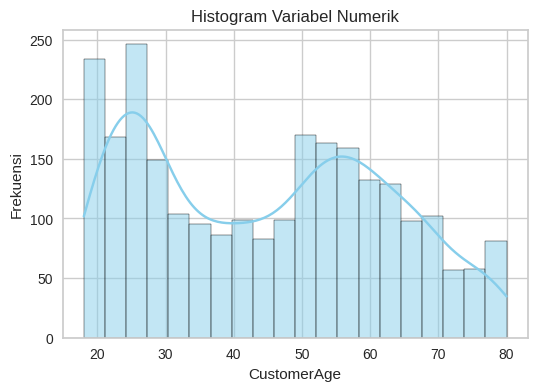

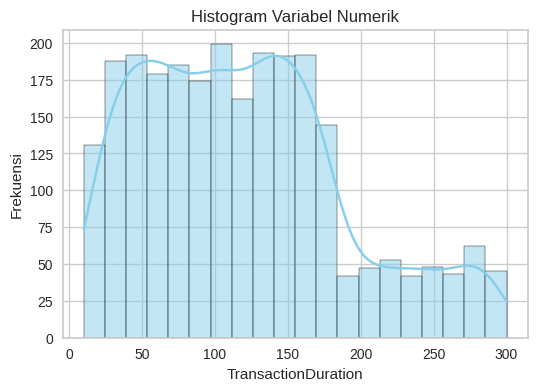

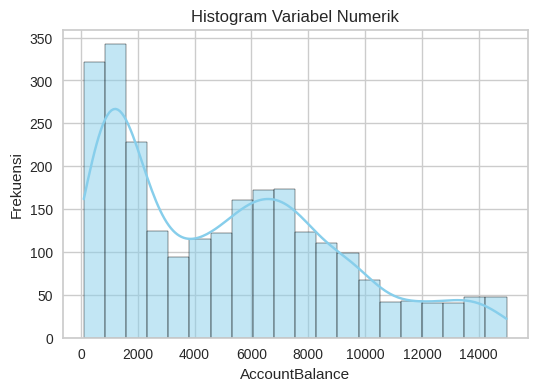

In [104]:
# Visualisasi variable numerik dengan histogram
for var in numeric_var:
  plt.figure(figsize=(6,4))
  sns.histplot(bank_data[var], bins=20, kde=True, color="skyblue")
  plt.title("Histogram Variabel Numerik")
  plt.xlabel(var)
  plt.ylabel("Frekuensi")
  plt.grid(True)
  plt.show()

In [105]:
# Memeriksa hubungan antar variable dengan matriks korelasi
matrix_korelasi = bank_data[numeric_var].corr()
print(matrix_korelasi)

                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
AccountBalance               -0.025165     0.319942             0.005577   

                     AccountBalance  
TransactionAmount         -0.025165  
CustomerAge                0.319942  
TransactionDuration        0.005577  
AccountBalance             1.000000  


#### Visualisasi Data

<ipython-input-106-9fa54b020932>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bank_data["Location"], palette="mako")


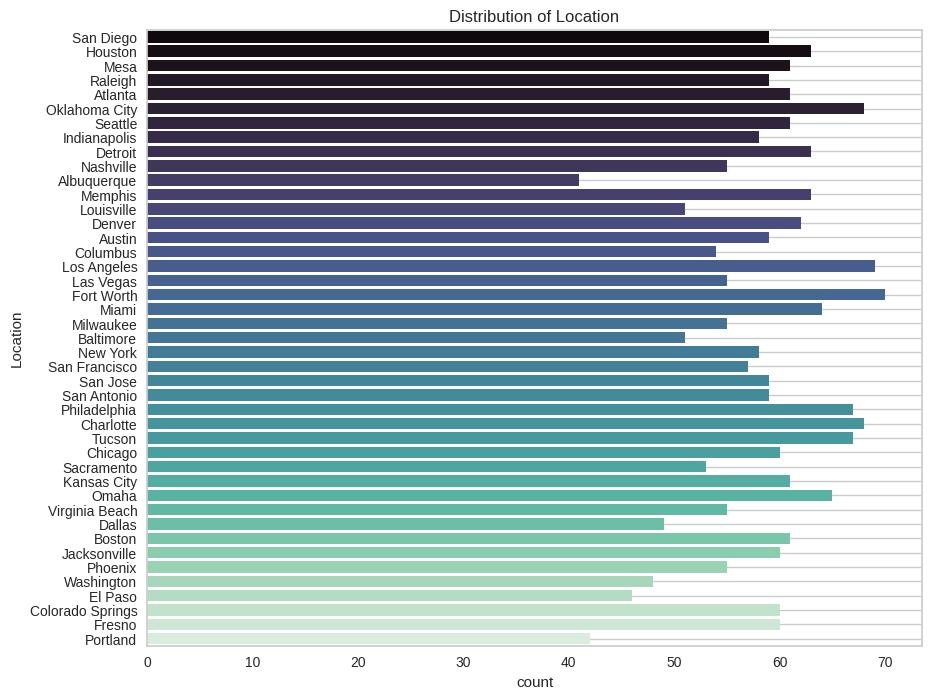

In [106]:
# Grafik distribusi location
plt.figure(figsize=(10, 8))
sns.countplot(y=bank_data["Location"], palette="mako")
plt.title("Distribution of Location")
plt.ylabel("Location")
plt.xlabel("count")
plt.grid()
plt.show()

In [107]:
# Variable kategorikal
categorikal = bank_data.select_dtypes(include=["object"]).columns
categorikal

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

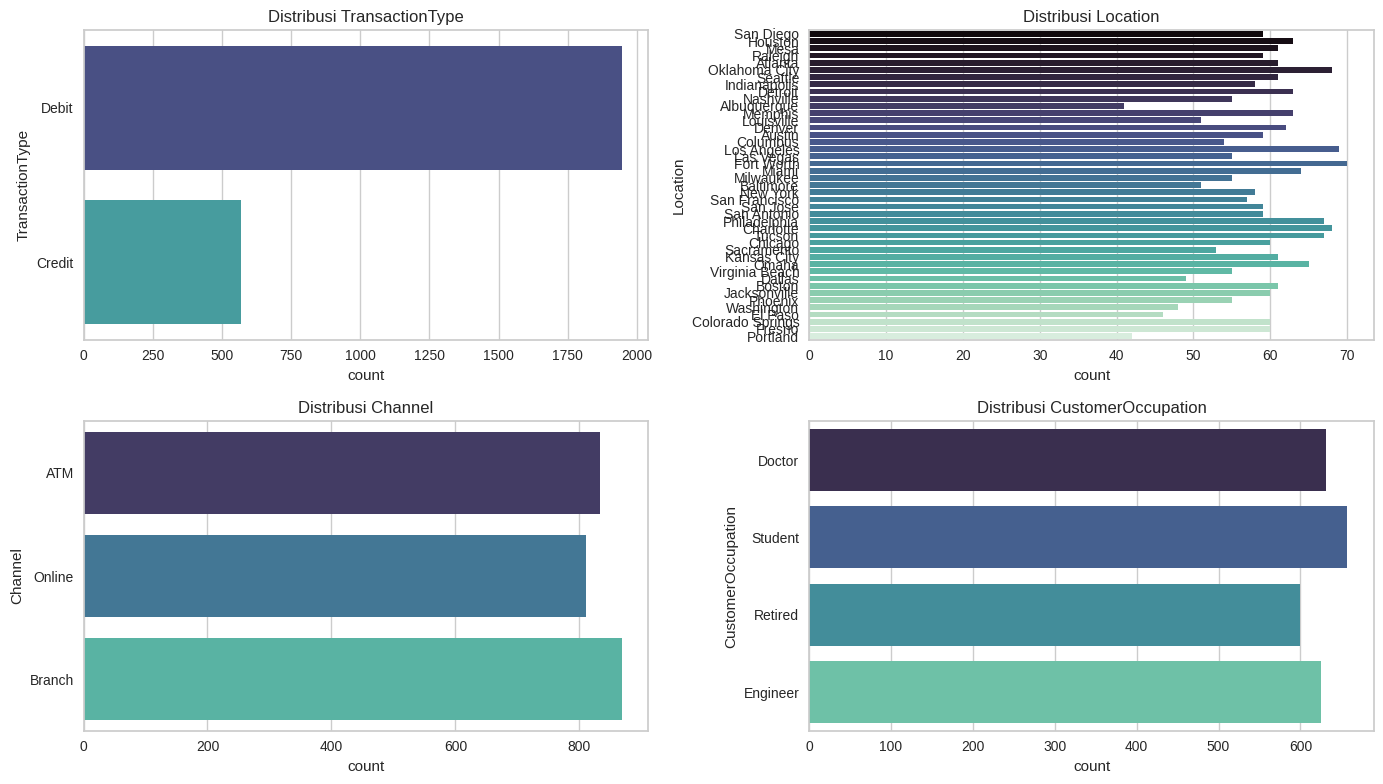

In [108]:
# Distribusi variable kategorikal
plt.figure(figsize=(14, 8))
for i, var in enumerate(categorikal, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=bank_data[var], hue=bank_data[var], palette='mako', legend=False)
    plt.title(f'Distribusi {var}')
plt.tight_layout()
plt.show()

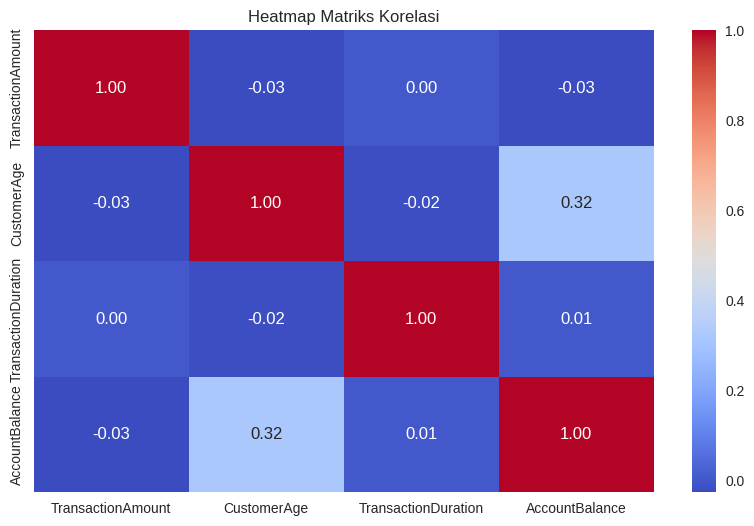

In [109]:
# Visualisasi data dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### Menghapus atau menangani missing value dan data duplikat

In [110]:
# Menangani missing value
print("Jumlah data kosong: ", bank_data.isna().sum())

# Menghapus duplikat
print("Jumlah Duplikasi Data: ", bank_data.duplicated())


Jumlah data kosong:  TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
AccountBalance         0
dtype: int64
Jumlah Duplikasi Data:  0       False
1       False
2       False
3       False
4       False
        ...  
2507    False
2508    False
2509    False
2510    False
2511    False
Length: 2512, dtype: bool


In [111]:
# Menyalin dataframe untuk preprocessing
data = bank_data.copy()

Note: Dataset tidak memiliki masalah missing value ataupun duplikat

#### Deteksi dan penanganan outlier

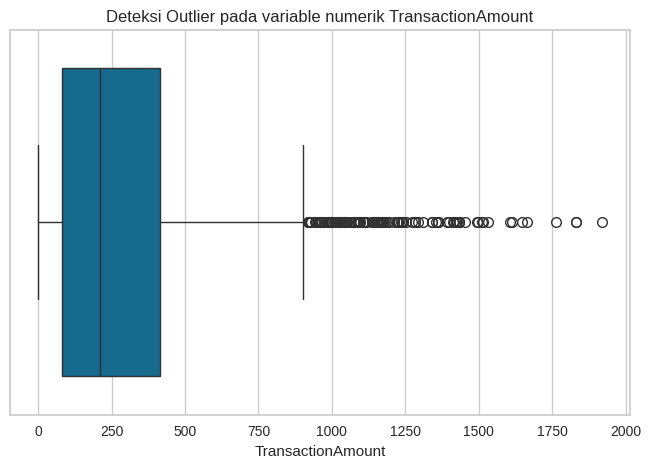

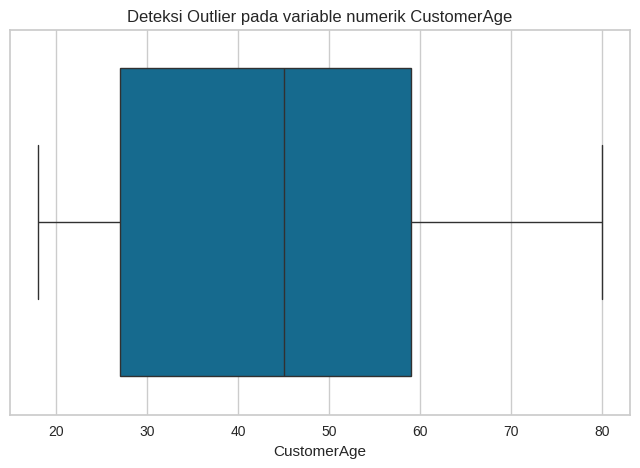

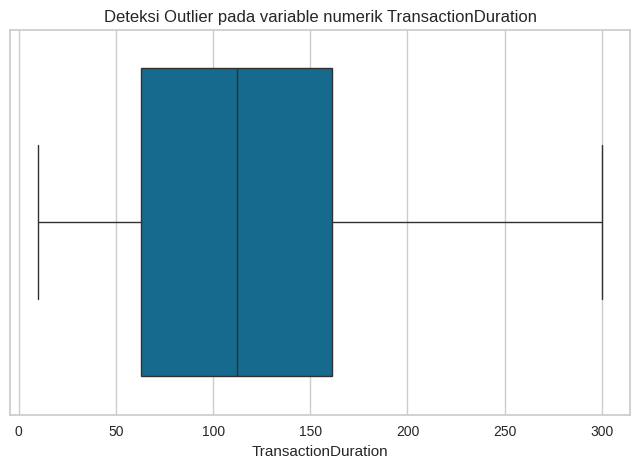

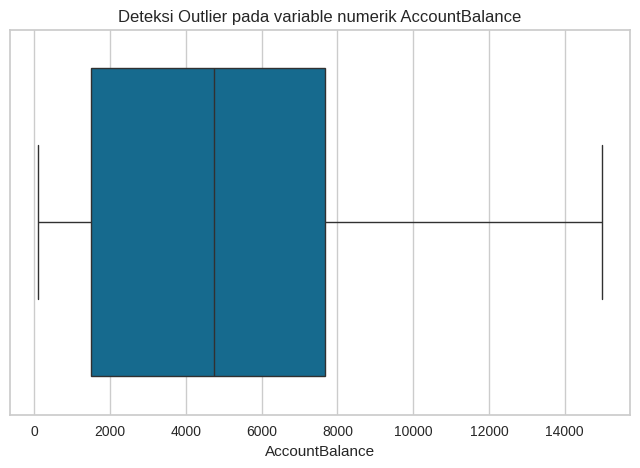

In [112]:
# Deteksi outlier dengan boxplot
for var in numeric_var:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=data[var])
  plt.title(f'Deteksi Outlier pada variable numerik {var}')
  plt.show()

Note: Terdapat outlier pada kolom transaction amount

In [113]:
# Mengatasi outlier dengan metode IQR
for var in numeric_var:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas IQR
    data[var] = data[var].clip(lower=lower_bound, upper=upper_bound)


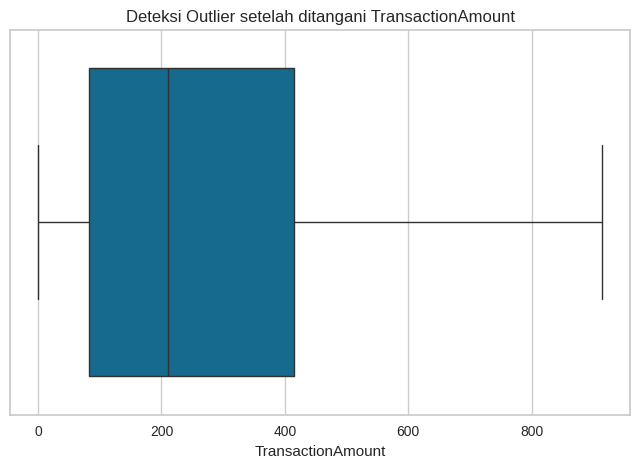

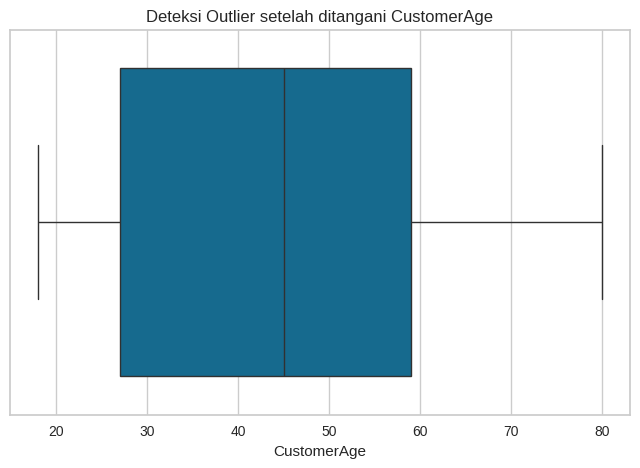

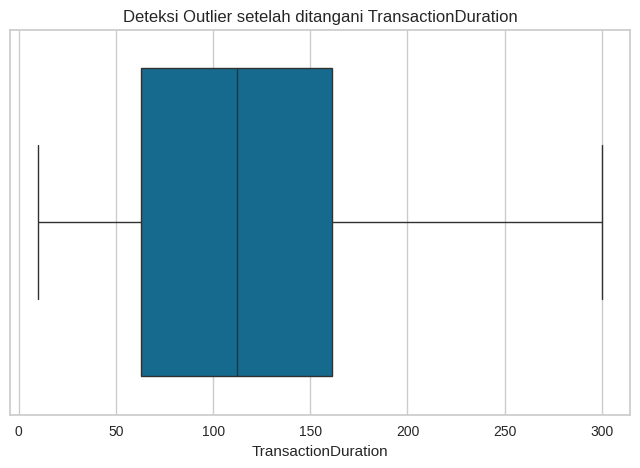

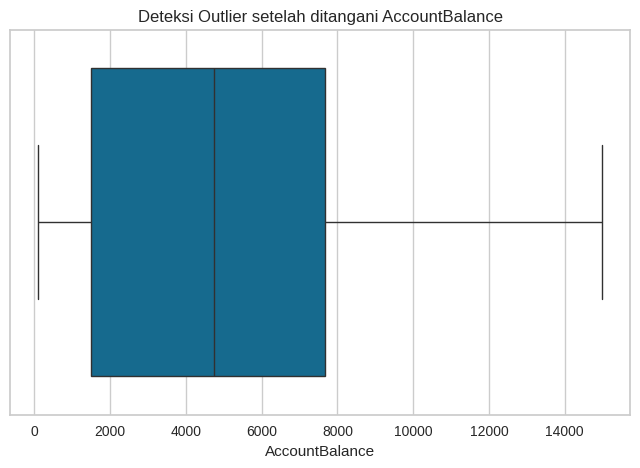

In [114]:
# Memeriksa kembali outlier
for var in numeric_var:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=data[var])
  plt.title(f'Deteksi Outlier setelah ditangani {var}')
  plt.show()

note: Data sudah aman dari outlier

#### Binning (Pengelompokan)

- Melakukan pengelompokan berdasarkan usia dengan rentang antara:

1. Usia 18-35
2. Usia 36-52
3. Usia 53-70
4. Usia 71-88

Serta membuat visualisasi data dengan menggunakan diagram batang



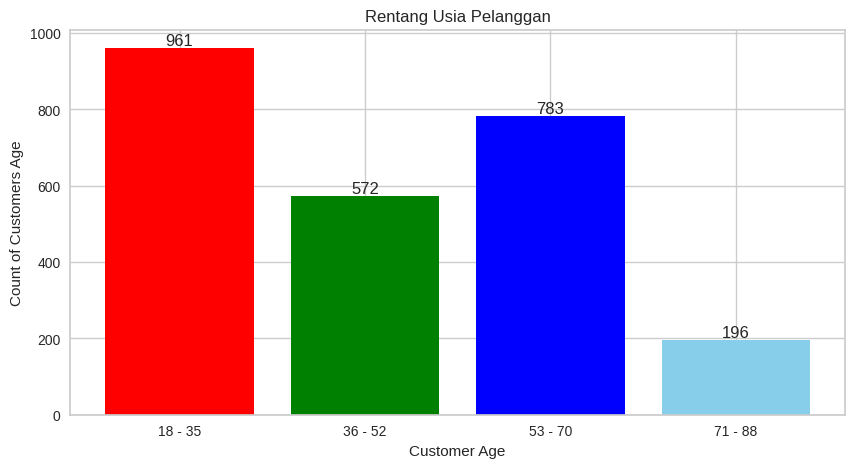

In [115]:
# Mengelompokan berdasarkan usia customer
# rentang usia 18--80
age1 = data.CustomerAge[(data.CustomerAge >= 18) & (data.CustomerAge <= 35)]
age2 = data.CustomerAge[(data.CustomerAge >= 36) & (data.CustomerAge <= 52)]
age3 = data.CustomerAge[(data.CustomerAge >= 53) & (data.CustomerAge <= 70)]
age4 = data.CustomerAge[(data.CustomerAge >= 71) & (data.CustomerAge <= 88)]

# Data plotting
agx = ["18 - 35", "36 - 52", "53 - 70", "71 - 88"]
agy = [len(age1.values), len(age2.values), len(age3.values), len(age4.values)]

# Bar chart
plt.figure(figsize=(10, 5))
plt.bar(agx, agy, color=['red', 'green', 'blue', 'skyblue', 'yellow'])
plt.title('Rentang Usia Pelanggan')
plt.xlabel("Customer Age")
plt.ylabel("Count of Customers Age")
plt.xticks(None)

for i in range(len(agx)):
  plt.text(i, agy[i], agy[i], ha='center', va='bottom')

plt.show()

- Melakukan pengelompokan berdasarkan jumlah saldo akun
- Melakukan visualisasi untuk menunjukan data yang lebih jelas dengan diagram batang

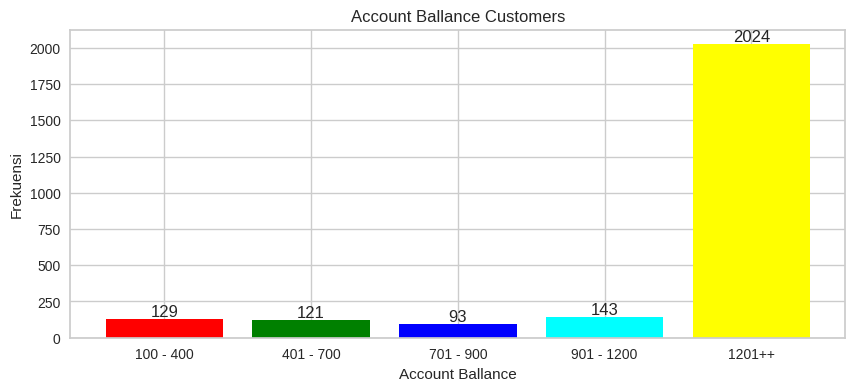

In [116]:
# Mengelompokan saldo akun setelah transaksi
acc1 = data.AccountBalance[(data.AccountBalance >= 101) & (data.AccountBalance <= 400)]
acc2 = data.AccountBalance[(data.AccountBalance >= 401) & (data.AccountBalance <= 700)]
acc3 = data.AccountBalance[(data.AccountBalance >= 701) & (data.AccountBalance <= 900)]
acc4 = data.AccountBalance[(data.AccountBalance >= 901) & (data.AccountBalance <= 1200)]
accAbove = data.AccountBalance[(data.AccountBalance >=1201)]

# Data ploting
accx = ["100 - 400", "401 - 700", "701 - 900", "901 - 1200", "1201++"]
accy = [len(acc1.values), len(acc2.values), len(acc3.values), len(acc4.values), len(accAbove.values)]

plt.figure(figsize=(10, 4))
plt.bar(accx, accy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Account Ballance Customers")
plt.xlabel("Account Ballance")
plt.ylabel("Frekuensi")

for i in range(len(accx)):
  plt.text(i, accy[i], accy[i], ha='center', va='bottom')

plt.show()

#### Normalisasi atau standardisasi fitur


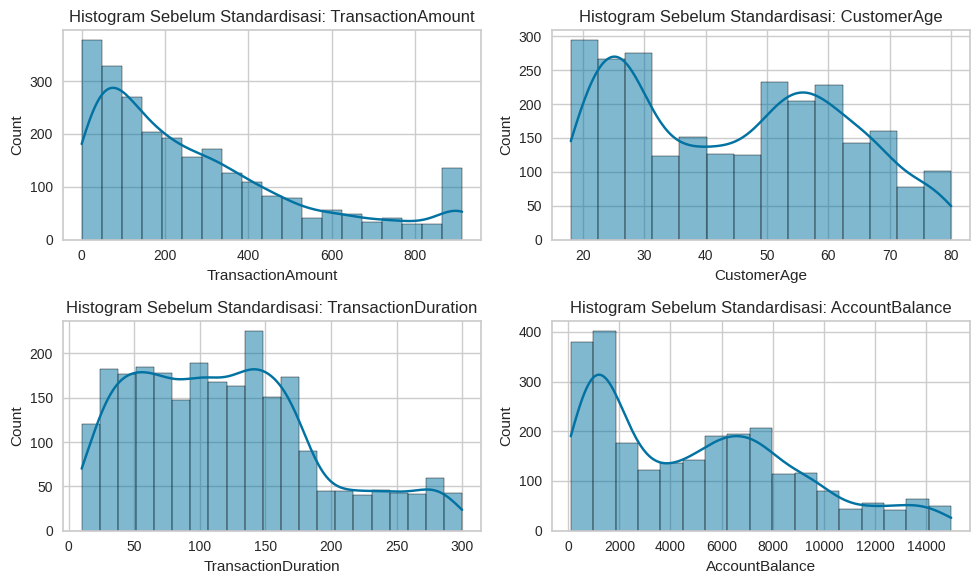

In [117]:
# Histogram variable numerik sebelum standardisasi
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numeric_var):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Histogram Sebelum Standardisasi: {feature}")
plt.tight_layout()
plt.show()

Data variabel numeric setelak dilakukan standarisasi
       TransactionAmount TransactionType          Location Channel  \
0              0.015144           Debit         San Diego     ATM   
1              0.411703           Debit           Houston     ATM   
2              0.138004           Debit              Mesa  Online   
3              0.201745           Debit           Raleigh  Online   
4              0.014443          Credit           Atlanta  Online   
...                 ...             ...               ...     ...   
2507           0.937276          Credit  Colorado Springs  Branch   
2508           0.275155           Debit            Tucson  Branch   
2509           0.031066           Debit         San Diego  Branch   
2510           0.203355           Debit            Denver  Online   
2511           0.265891          Credit      Jacksonville  Online   

      CustomerAge CustomerOccupation  TransactionDuration  AccountBalance  
0        0.838710             Doctor     

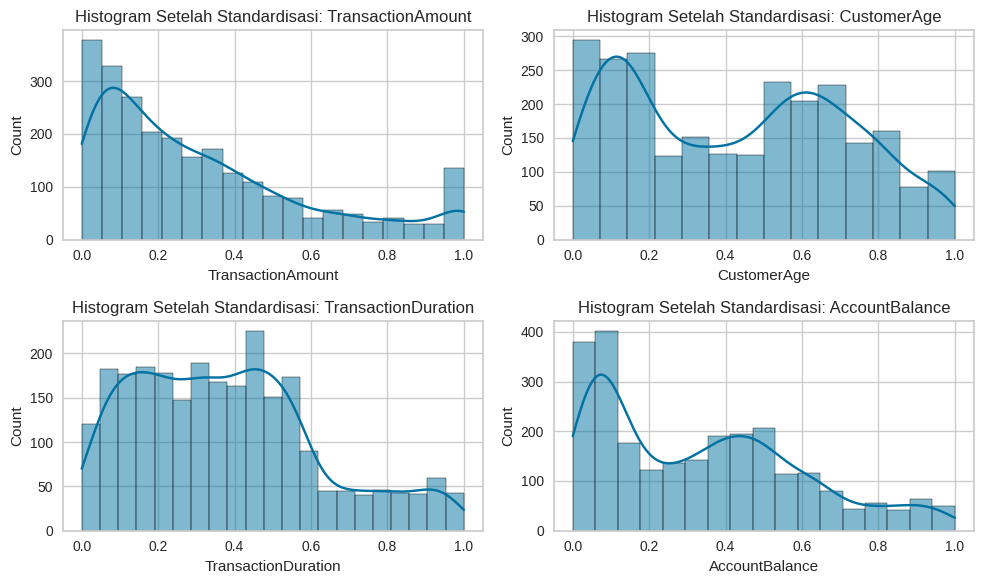

In [118]:
# Melakukan standarisasi pada variable numerik
scaler = MinMaxScaler()
data[numeric_var] = scaler.fit_transform(data[numeric_var])

print("Data variabel numeric setelak dilakukan standarisasi\n", data)

# Histogram variable numerik setelah dilakukan standardisasi
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numeric_var):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Histogram Setelah Standardisasi: {feature}")
plt.tight_layout()
plt.show()

#### 4. Encoding data kategorikal

In [119]:
print("Kolom data kategorikal: \n", data[categorikal]) #Memeriksa variable kategorikal

Kolom data kategorikal: 
      TransactionType          Location Channel CustomerOccupation
0              Debit         San Diego     ATM             Doctor
1              Debit           Houston     ATM             Doctor
2              Debit              Mesa  Online            Student
3              Debit           Raleigh  Online            Student
4             Credit           Atlanta  Online            Student
...              ...               ...     ...                ...
2507          Credit  Colorado Springs  Branch             Doctor
2508           Debit            Tucson  Branch             Doctor
2509           Debit         San Diego  Branch            Retired
2510           Debit            Denver  Online            Student
2511          Credit      Jacksonville  Online            Student

[2512 rows x 4 columns]


In [120]:
# Melakukan encoding pada variabel kategorikal dengan labelencoder
encode = {}
data_encode = data.copy()

for cat in categorikal:
  encode[cat] = LabelEncoder()
  data_encode[cat] = encode[cat].fit_transform(data_encode[cat])

print("Variabel kategori setelah dilakukan encoding")
# Melihat hasil encoding
data_encode.head()


Variabel kategori setelah dilakukan encoding


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,0.015144,1,36,0,0.838710,0,0.244828,0.336832
1,0.411703,1,15,0,0.806452,0,0.451724,0.918055
2,0.138004,1,23,2,0.016129,3,0.158621,0.068637
3,0.201745,1,33,2,0.129032,3,0.051724,0.569198
4,0.014443,0,1,2,0.129032,3,0.648276,0.492591


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

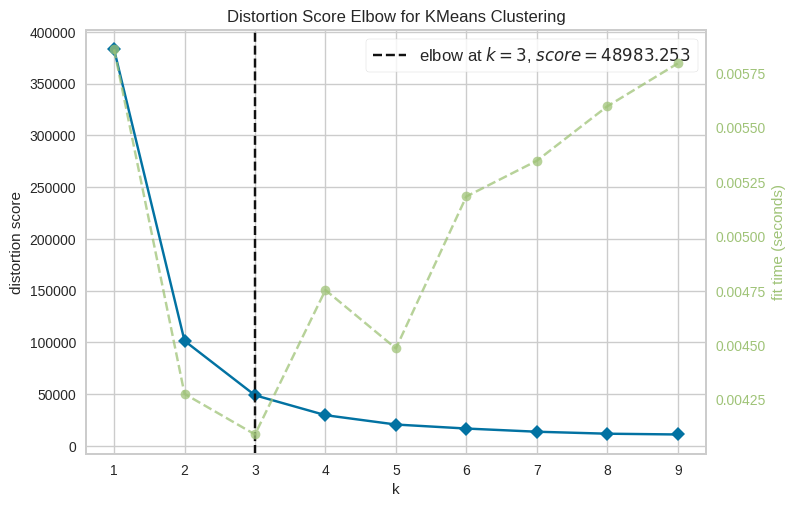

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
# Iisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)

# Inisial Visualizer elbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data
visualizer.fit(data_encode)
visualizer.show()

In [122]:
# Melatih model dengan algoritma Kmeans dan menganalisis karakteristik tiap cluster
# Inisialisasi dan melatih model kmeans dengan jumlah kluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_encode)

labels = kmeans.labels_
k = 3

def analyze_cluster(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        # Rata-rata untuk fitur numerik
        rata_rata_transaksi = cluster_data['TransactionAmount'].mean()
        rata_rata_saldo_akun = cluster_data['AccountBalance'].mean()
        usia_pelanggan = cluster_data['CustomerAge'].mean()

        # Modus untuk fitur kategorikal
        modus_channel = cluster_data['Channel'].mode().values[0]
        modus_pekerjaan_pelanggan = cluster_data['CustomerOccupation'].mode().values[0]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Jumlah Transaksi: {rata_rata_transaksi:.2f}")
        print(f"Rata-rata Saldo Akun: {rata_rata_saldo_akun:.2f}")
        print(f"Rata-rata Usia Pelanggan: {usia_pelanggan:.2f}")
        print(f"Modus Channel: {modus_channel}")
        print(f"Modus Pekerjaan Pelanggan: {modus_pekerjaan_pelanggan}")

# Menganalisis karakteristik setiap cluster
analyze_cluster(data_encode, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Jumlah Transaksi: 0.31
Rata-rata Saldo Akun: 0.33
Rata-rata Usia Pelanggan: 0.44
Modus Channel: 1
Modus Pekerjaan Pelanggan: 1

Cluster 2:
Rata-rata Jumlah Transaksi: 0.31
Rata-rata Saldo Akun: 0.34
Rata-rata Usia Pelanggan: 0.44
Modus Channel: 1
Modus Pekerjaan Pelanggan: 3

Cluster 3:
Rata-rata Jumlah Transaksi: 0.31
Rata-rata Saldo Akun: 0.34
Rata-rata Usia Pelanggan: 0.42
Modus Channel: 1
Modus Pekerjaan Pelanggan: 3


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

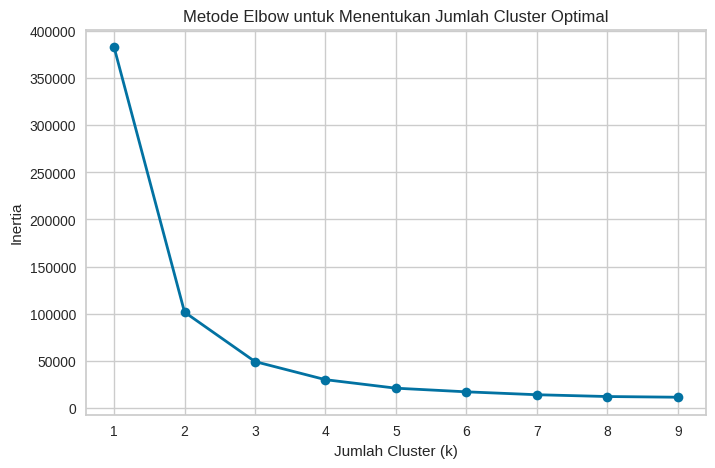

In [123]:
# menentuka jumlah cluster optimal dengan
inertia = []
K = range(1, 10)  # Range cluster dari 2 sampai 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encode)  # Gunakan data yang sudah discaling
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()


Jumlah cluster: 2, Silhouette Score: 0.6006
Jumlah cluster: 3, Silhouette Score: 0.5409
Jumlah cluster: 4, Silhouette Score: 0.5125
Jumlah cluster: 5, Silhouette Score: 0.4791
Jumlah cluster: 6, Silhouette Score: 0.4393
Jumlah cluster: 7, Silhouette Score: 0.4124
Jumlah cluster: 8, Silhouette Score: 0.3899
Jumlah cluster: 9, Silhouette Score: 0.3686
Jumlah cluster: 10, Silhouette Score: 0.3409


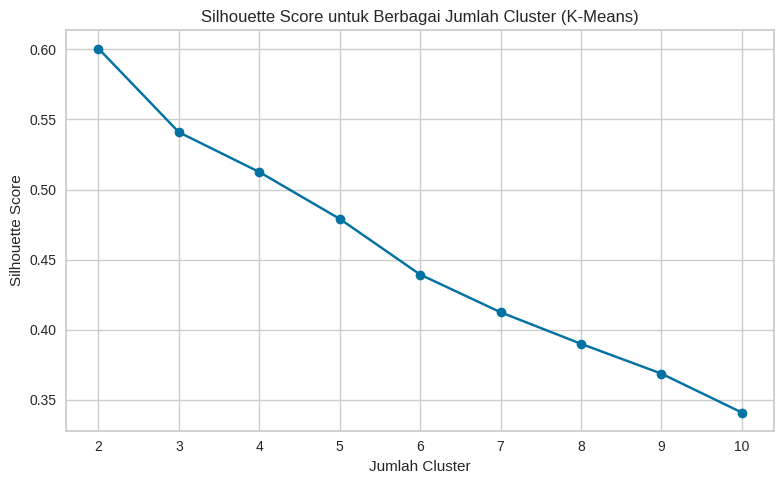


Jumlah kluster terbaik berdasarkan Silhouette Score: 2


In [124]:
# 2. Mengevaluasi kualitas cluster dengan Silhouette Score untuk K-Means
def evaluate_kmeans_clusters(data_encode, max_clusters=10):

    silhouette_scores = []

    # Cluster mulai dari 2 karena silhouette tidak terdefinisi untuk 1 cluster
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data_encode)
        silhouette_avg = silhouette_score(data_encode, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Jumlah cluster: {k}, Silhouette Score: {silhouette_avg:.4f}")

    return silhouette_scores

# Visualisasi Silhouette Scores
silhouette_values = evaluate_kmeans_clusters(data_encode)

plt.figure(figsize=(8, 5))
plt.plot(range(2, len(silhouette_values) + 2), silhouette_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster (K-Means)')
plt.grid(True)
plt.tight_layout()
plt.show()

best_k = silhouette_values.index(max(silhouette_values)) +2
print(f"\nJumlah kluster terbaik berdasarkan Silhouette Score: {best_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fitur yang dipilih: Index(['TransactionAmount', 'Location', 'Channel', 'CustomerAge',
       'TransactionDuration'],
      dtype='object')


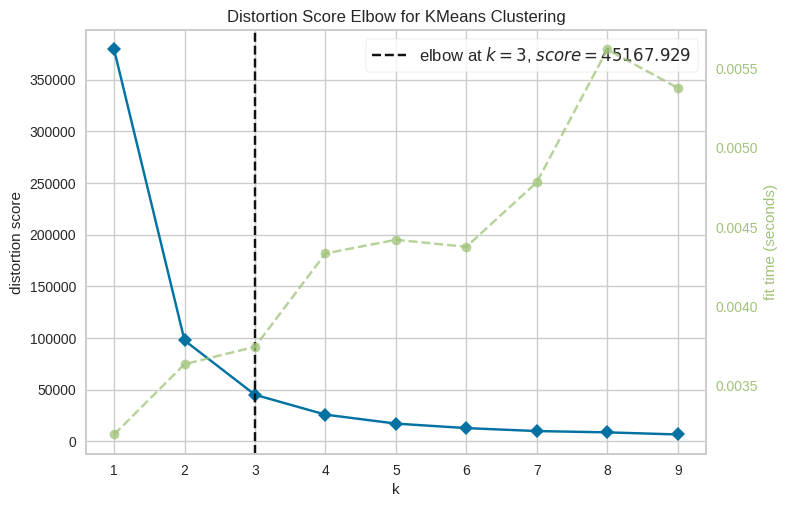

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
# 1. Gunakan model berbasis pohon untuk evaluasi fitur
model = LogisticRegression(max_iter=500)

# 2. Terapkan RFE (cari 5 fitur terbaik)
selector = RFE(model, n_features_to_select=5)
selector.fit_transform(data_encode, labels)

# 3. Cek fitur mana yang dipilih
selected_features = data_encode.columns[selector.get_support(indices=True)]
print("Fitur yang dipilih:", selected_features)

# Metode Elbow untuk menentukan k optimal setelah feature selection
visualizer_rfe = KElbowVisualizer(kmeans, k=(1, 10))

# Fit data dengan visualizer
visualizer_rfe.fit(data_encode[selected_features])

visualizer_rfe.show()

In [126]:
# Copy df based on selected features from rfe
k_means_rfe = data_encode[selected_features]

silhouette_avg = silhouette_score(data_encode, labels)
print(f"Silhouette Score before Feature Selection: {silhouette_avg}")
# Rebuild the model with selected features
model_kmeans_rfe = KMeans(n_clusters=2, random_state=0)
model_kmeans_rfe.fit(k_means_rfe)

# Get the cluster labels
cluster_labels_rfe = model_kmeans_rfe.labels_

# Evaluate the model using Silhouette Score
silhouette_avg_rfe = silhouette_score(data_encode[selected_features], cluster_labels_rfe)

print(f"Silhouette Score after Feature Selection: {silhouette_avg_rfe}")

Silhouette Score before Feature Selection: 0.5411643635407434
Silhouette Score after Feature Selection: 0.613492792803412


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

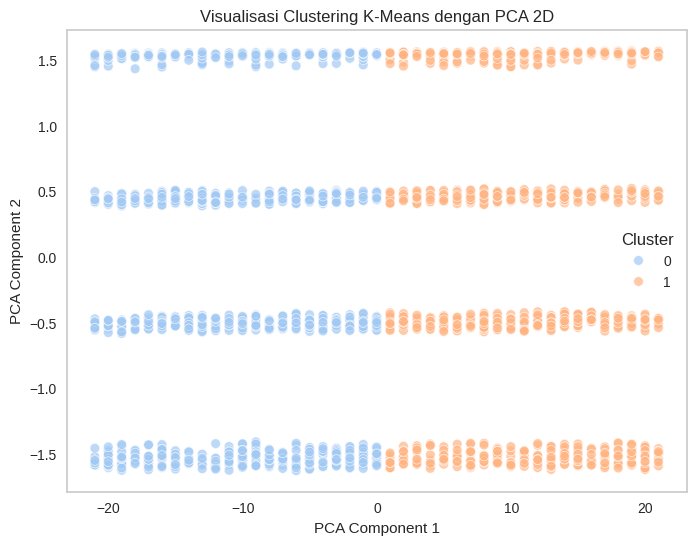

In [127]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_encode)

# Tambahkan label cluster ke DataFrame PCA
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(df_pca)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels_optimal

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca['Cluster'], palette="pastel", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering K-Means dengan PCA 2D")
plt.legend(title="Cluster")
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [128]:
df = data_encode.copy()
df['Cluster'] = cluster_labels_rfe

print("df sebelum transformasi")
print(df.head())

# Sekarang inverse
df['Channel'] = encode['Channel'].inverse_transform(df['Channel'])
df['TransactionType'] = encode['TransactionType'].inverse_transform(df['TransactionType'])
df['Location'] = encode['Location'].inverse_transform(df['Location'])
df['CustomerOccupation'] = encode['CustomerOccupation'].inverse_transform(df['CustomerOccupation'])

print("\ndf After Inverse Transform:")
print(df.head())

df sebelum transformasi
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.015144                1        36        0     0.838710   
1           0.411703                1        15        0     0.806452   
2           0.138004                1        23        2     0.016129   
3           0.201745                1        33        2     0.129032   
4           0.014443                0         1        2     0.129032   

   CustomerOccupation  TransactionDuration  AccountBalance  Cluster  
0                   0             0.244828        0.336832        0  
1                   0             0.451724        0.918055        1  
2                   3             0.158621        0.068637        0  
3                   3             0.051724        0.569198        0  
4                   3             0.648276        0.492591        1  

df After Inverse Transform:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0           0.01

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [129]:
# Transformasi data yang sudah distandarisasi
numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
scaled_numerik_df = df[numerik]

df[numerik] = scaler.inverse_transform(scaled_numerik_df)

print('\nData setelah transformasi')
df.head()


Data setelah transformasi


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,5112.21,0
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,13758.91,1
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1122.35,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,8569.06,0
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,7429.40,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [130]:
def analyze_cluster(df):
    print("Analisis Karakteristik Setiap Cluster:")

    for cluster_id in sorted(df["Cluster"].unique()):
        cluster_data = df[df["Cluster"] == cluster_id]

        print(f"\nCluster {cluster_id}:")
        print(f"- Jumlah data: {len(cluster_data)}")
        print(f"- Rata-rata jumlah transaksi: {cluster_data['TransactionAmount'].mean():,.2f}")
        print(f"- Rata-rata umur pelanggan: {cluster_data['CustomerAge'].mean():,.2f}")
        print(f"- Rata-rata durasi transaksi: {cluster_data['TransactionDuration'].mean():,.2f}")
        print(f"- Rata-rata saldo akun: {cluster_data['AccountBalance'].mean():,.2f}")
        print(f"- Modus tipe transaksi: {cluster_data['TransactionType'].mode().values[0]}")
        print(f"- Modus lokasi: {cluster_data['Location'].mode().values[0]}")
        print(f"- Modus channel: {cluster_data['Channel'].mode().values[0]}")
        print(f"- Modus pekerjaan: {cluster_data['CustomerOccupation'].mode().values[0]}")

analyze_cluster(df)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
- Jumlah data: 1230
- Rata-rata jumlah transaksi: 286.71
- Rata-rata umur pelanggan: 44.26
- Rata-rata durasi transaksi: 118.29
- Rata-rata saldo akun: 5,067.67
- Modus tipe transaksi: Debit
- Modus lokasi: Oklahoma City
- Modus channel: Branch
- Modus pekerjaan: Student

Cluster 1:
- Jumlah data: 1282
- Rata-rata jumlah transaksi: 283.06
- Rata-rata umur pelanggan: 45.07
- Rata-rata durasi transaksi: 120.94
- Rata-rata saldo akun: 5,159.05
- Modus tipe transaksi: Debit
- Modus lokasi: Fort Worth
- Modus channel: Branch
- Modus pekerjaan: Doctor


#Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Jumlah data: 1230
- Rata-rata jumlah transaksi: 286.71
- Rata-rata umur pelanggan: 44.26
- Rata-rata durasi transaksi: 118.29
- Rata-rata saldo akun: 5,067.67
- Modus tipe transaksi: Debit
- Modus lokasi: Oklahoma City
- Modus channel: Branch
- Modus pekerjaan: Student

Analisis: Cluster pertama didominasi oleh Student atau pelajar, yang mana sebagian besar pelanggan melakukan transaksi melalui Debit dan menggunakan channel Branch. Meskipun status pelajar lebih banyak, rata-rata umur pelanggan dalam cluster ini justru cukup tinggi, yaitu sekitar 44 tahun, yang bisa jadi menunjukkan bahwa kategori "Student" mencakup pembelajar usia dewasa. Lokasi paling dominan berasal dari Oklahoma City, dan rata-rata saldo akun pelanggan dalam cluster ini adalah 5,067.67.

## Cluster 2:
- Jumlah data: 1282
- Rata-rata jumlah transaksi: 283.06
- Rata-rata umur pelanggan: 45.07
- Rata-rata durasi transaksi: 120.94
- Rata-rata saldo akun: 5,159.05
- Modus tipe transaksi: Debit
- Modus lokasi: Fort Worth
- Modus channel: Branch
- Modus pekerjaan: Doctor

Analisis: Cluster kedua didominasi oleh pelanggan yang berprofesi sebagai Doctor. Pola transaksi pada cluster ini sangat mirip dengan cluster pertama, yaitu sama-sama cenderung menggunakan Debit dan channel Branch untuk bertransaksi. Rata-rata usia pelanggan sedikit lebih tinggi dibanding cluster pertama, yakni sekitar 45 tahun. Lokasi terbanyak berasal dari Fort Worth, dan saldo akun rata-rata sedikit lebih tinggi dibandingkan cluster pertama, yaitu sebesar 5,159.05.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [133]:
df.to_csv("bank_for_clasification.csv", index=False)